In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [4]:
# Initial load of the raw data set and preview of the first 10 rows
netflix = pd.read_csv('netflix_titles.csv')
print(netflix.head(10))

  show_id     type                             title  \
0      s1    Movie              Dick Johnson Is Dead   
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
3      s4  TV Show             Jailbirds New Orleans   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   
7      s8    Movie                           Sankofa   
8      s9  TV Show     The Great British Baking Show   
9     s10    Movie                      The Starling   

                        director  \
0                Kirsten Johnson   
1                            NaN   
2                Julien Leclercq   
3                            NaN   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   
7                   Haile Gerima   
8                Andy Devonshire   
9                 Theod

In [5]:
# Data set with null/NaN values removed
cleaned_netflix = netflix.dropna()
print(cleaned_netflix.head(10))

   show_id     type                          title             director  \
7       s8    Movie                        Sankofa         Haile Gerima   
8       s9  TV Show  The Great British Baking Show      Andy Devonshire   
9      s10    Movie                   The Starling       Theodore Melfi   
12     s13    Movie                   Je Suis Karl  Christian Schwochow   
24     s25    Movie                          Jeans           S. Shankar   
27     s28    Movie                      Grown Ups         Dennis Dugan   
28     s29    Movie                     Dark Skies        Scott Stewart   
29     s30    Movie                       Paranoia       Robert Luketic   
38     s39    Movie            Birth of the Dragon         George Nolfi   
41     s42    Movie                           Jaws     Steven Spielberg   

                                                 cast  \
7   Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...   
8   Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...   
9  

<AxesSubplot:xlabel='type', ylabel='count'>

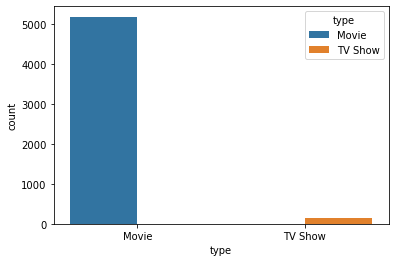

In [8]:
sns.countplot(x='type', hue='type', data=cleaned_netflix)

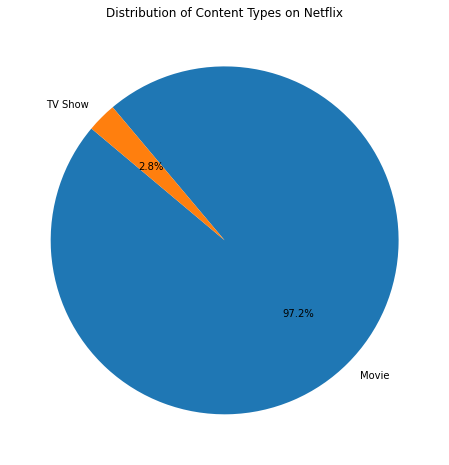

In [12]:
# Explore the distribution of content types (Movies vs. TV Shows)
content_distribution = cleaned_netflix['type'].value_counts()

# Visualize the distribution of content types using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(content_distribution, labels=content_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types on Netflix')
plt.show()

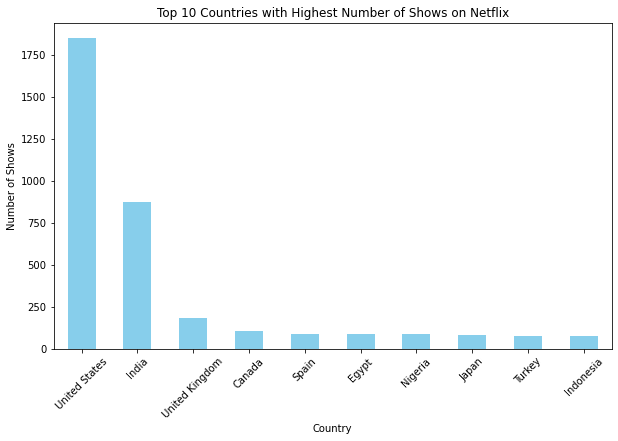

In [13]:
# Analyze the distribution of shows based on countries
country_distribution = cleaned_netflix['country'].value_counts().head(10)

# Visualize the top 10 countries with the highest number of shows using a bar plot
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with Highest Number of Shows on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=45)
plt.show()

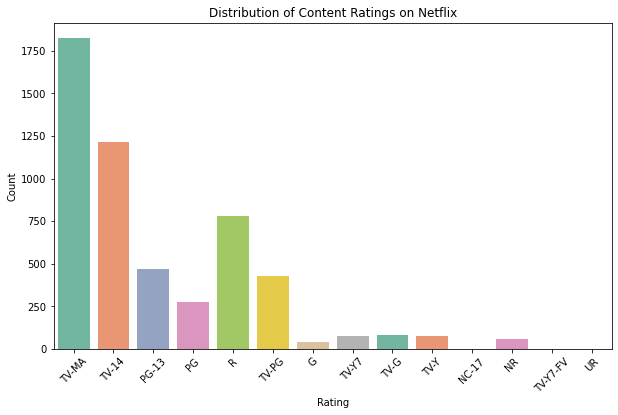

In [15]:
# Explore the distribution of content ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_netflix, x='rating', palette='Set2')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

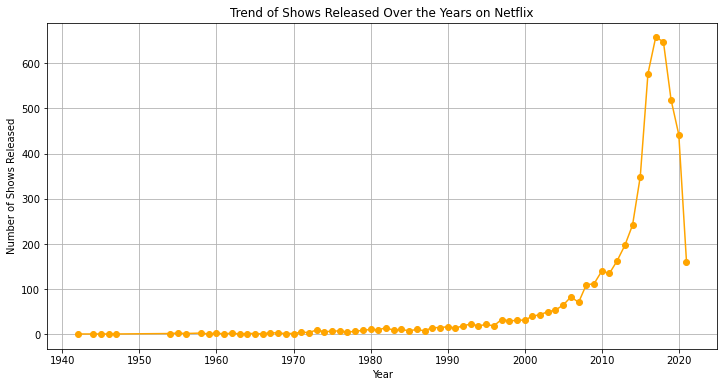

In [16]:
# Analyze the trend of shows released over the years
release_trend = cleaned_netflix['release_year'].value_counts().sort_index()

# Visualize the number of shows released each year using a line plot
plt.figure(figsize=(12, 6))
release_trend.plot(kind='line', marker='o', color='orange')
plt.title('Trend of Shows Released Over the Years on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Shows Released')
plt.grid(True)
plt.show()

C:\Users\ihedges\AppData\Local\Temp\ipykernel_14968\1149280356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_netflix['duration_type'] = cleaned_netflix['type'].apply(lambda x: 'Seasons' if x == 'TV Show' else 'Minutes')


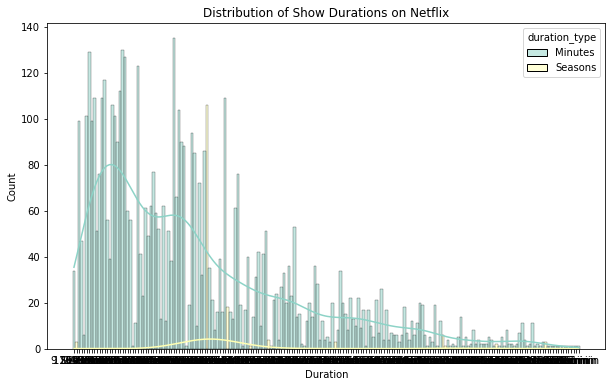

In [17]:
# Analyze the distribution of show durations
# Assuming 'duration' column contains both TV show seasons and movie durations
cleaned_netflix['duration_type'] = cleaned_netflix['type'].apply(lambda x: 'Seasons' if x == 'TV Show' else 'Minutes')

# Visualize the distribution of show durations using appropriate visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_netflix, x='duration', hue='duration_type', bins=30, kde=True, palette='Set3')
plt.title('Distribution of Show Durations on Netflix')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()